In [3]:
import pandas as pd
import numpy as np

In [4]:
#Binomial Probability Distribution  (BPD)
import math

def get_comb(n,r):
    return math.factorial(n)/(math.factorial(r)*math.factorial(n-r))

#Actual method to get binomial probability
def get_prob(n, r, p):
    if r == 0:
        return (1-p)**n
    else:
        return get_comb(n,r)*(p**r)*((1-p)**(n-r))

In [5]:
#Testing the BPD function
get_prob(10,2,0.5)

0.0439453125

Text(0.5, 1.0, 'Plotting Simulations and Binomial Probability against each other')

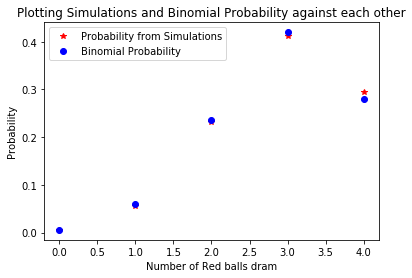

In [7]:
b = [1,1,1,0,1,1,0,1,0,1,1]  # 1 for Red and 0 for blue
n = 4 # Number of Tries
s = 2000 # Number of Simulations

import random
tests = [] #For holding Simulations results

#Simulations
for i in range(0,s):
    temp = []
    for i in range(0,4):
        temp.append(random.sample(b, 1)[0])
    tests.append(temp)

#Getting the occurance of 1 in list b, which is further required to find Probability
def count(l):
    res = 0
    for i in l:
        if i == 1:
            res = res + i
    return res

#Storing the number of times 0,1,2,3,4 balls were drawn from b
d={}
for i in tests:
    if count(i) in d.keys():
        d[count(i)] = d[count(i)] + 1
    else:
        d[count(i)] = 1

#Getting Binomial Distribution Probabilities for 0,1,2,3,4
d1 = {}

p = get_count(b)/len(b)
for i in range(0,n+1):
    d1[i] = round(float(get_prob(n, i, p)), 3)


#Converting to data frames for plotting
df = pd.DataFrame(d.values(), index=d.keys())

df = df.sort_index()

df = df[0]/s

df1 = pd.DataFrame(d1.values(), index=d1.keys())

#plotting the 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df, "r*", label="Probability from Simulations")
plt.plot(df1, "bo", label="Binomial Probability")
plt.xlabel("Number of Red balls dram")
plt.ylabel("Probability")
plt.legend()
plt.title("Plotting Simulations and Binomial Probability against each other")

In [58]:
#Lets experiment for expected value

#Condition
# If a person gets 4 reds i.e. r=4, let's pay him Rs.150(values = +150) and 
# anything else we get Rs.10(so the value is -10)

#Let's get the winning amount and charge for playing the game such that it is profitable for the house
#Once the Expected Value(EV) becomes negative, it will be profitable for the house

def evaluate_EV(prob_dict, pay_max = 150, charge_max = 10, step=5, charge_const=False, pay_const=False):
    #prob_dict: list of values and their probabilities
    #pay_max: Winning amount
    #charge_max: charge for playing the game
    #step: increasing/Decreasing the charge_max/pay_max by this value
    #charge_const: Should the charge for playing the game be kept constant, by default False
    #pay_const: Should the Winning amount be kept constant, by default False
    
    if charge_const and pay_const:
        print("This cannot be solved as both winning amount and charge for playing should be kept constant")
        return None
    
    EV=0
    #Let's take the probabilities we got by BPD while calculating expect value
    for i in prob_dict.keys():
        if i > 3:
            EV = EV + pay_max*prob_dict[i]
        else:
            EV = EV - charge_max*prob_dict[i]

    #lets keep Charge money increasing and prize money decreasing    
    if (not charge_const) and (not pay_const):           
        if round(EV, 2) > 0:
            EV = evaluate_EV(prob_dict=d1, pay_max=pay_max-step, charge_max=charge_max+step, step=step)
        else:
            #print("Printing for all non const")
            print("Prize Money "+str(pay_max))
            print("Charge Money "+str(charge_max))
            return(round(EV,2))
    
    #lets keep Charge money constant  
    if charge_const:      
        if round(EV, 2) > 0:
            EV = evaluate_EV(prob_dict=d1, pay_max=pay_max-step, charge_max=charge_max, step=ste, charge_const=True)
        else:
            print("Prize Money "+str(pay_max))
            print("Charge Money "+str(charge_max))
            return(round(EV,2))
    return(EV)



print("Expected Value: "+str(evaluate_EV(prob_dict=d1,pay_max=150,charge_max=20,step=5,charge_const=False)))


Prize Money 120
Charge Money 50
Expected Value: -2.45


In [15]:
print("Expected Value: "+
      str(evaluate_EV(prob_dict=d1,pay_max=150,charge_max=20,step=5,charge_const=True, pay_const=True)))

This cannot be solved as both winning amount and charge for playing should be kept constant
Expected Value: None


In [31]:
def win(gd, pay, charge):
    win = 0
    for i in gd.keys():
        if i == 4:
            win = win + gd[i]*pay
        else:
            win = win - gd[i]*charge
    return win
    

In [254]:
#Now lets play 100 games 100 times:
all_games = []
limit = 500
limit_range = {}
for m in range(0, limit, 5):
    for j in range(0,5):
        game = []

        #Simulations
        for i in range(0,100):
            temp = []
            for i in range(0,4):
                temp.append(random.sample(b, 1)[0])
            game.append(temp)

        game

        #Storing the number of times 0,1,2,3,4 balls were drawn from b
        g={}
        for i in game:
            if count(i) in g.keys():
                g[count(i)] = g[count(i)] + 1
            else:
                g[count(i)] = 1
        #print(g)
        all_games.append(win(g, 120, 50))
    limit_range[m] = np.mean(all_games)


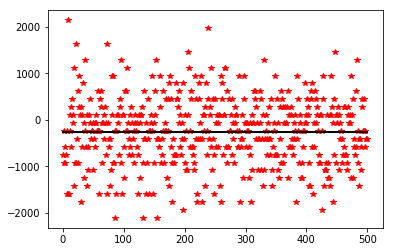

In [255]:
plt.plot(all_games, "*r")
plt.plot([0, limit], [np.mean(all_games), np.mean(all_games)], 'k-', lw=2)

In [256]:
print("Average winning amount per game is: "+ 
      str(np.mean(all_games)/100))

Average winning amount per game is: -2.6108


In [257]:
l=pd.DataFrame(limit_range.items())
l[1] = l[1]/100

Text(0.5, 1.0, '100 Games played vs Win per game')

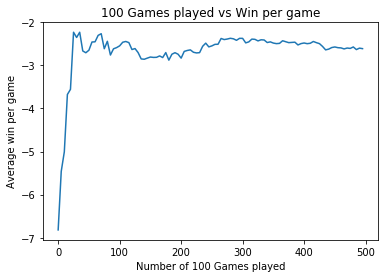

In [258]:
plt.plot(l.iloc[:, :1], l.iloc[:, 1])
plt.xlabel("Number of 100 Games played")
plt.ylabel("Average win per game")
plt.title("100 Games played vs Win per game")

(array([  3.,   8.,  42.,  84., 126., 189., 137.,  77.,  25.,   9.]),
 array([1.7 , 2.04, 2.38, 2.72, 3.06, 3.4 , 3.74, 4.08, 4.42, 4.76, 5.1 ]),
 <a list of 10 Patch objects>)

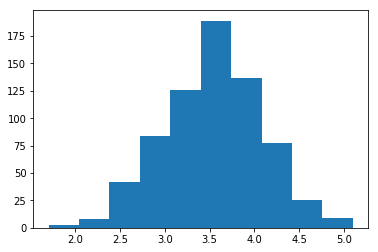

In [315]:
#CLT
no_of_samples =700
t = []   #Average of 10 random outcomes
sd = []  #Standard Deviation of 10 random outcomes
for i in range(0, no_of_samples):
    m = np.random.randint(1,7, 10)
    t.append(np.mean(m))
    sd.append(np.std(m))
plt.hist(t)

(array([  1.,  10.,  22.,  67., 113., 201., 168.,  77.,  37.,   4.]),
 array([0.6       , 0.77345235, 0.9469047 , 1.12035705, 1.2938094 ,
        1.46726175, 1.6407141 , 1.81416645, 1.9876188 , 2.16107116,
        2.33452351]),
 <a list of 10 Patch objects>)

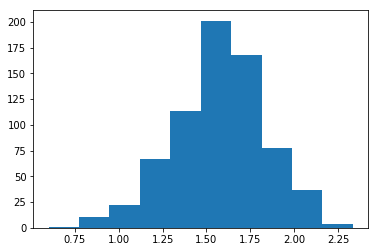

In [316]:
#Plot of Standard deviation
plt.hist(sd)

In [321]:
#Getting range of values depending upon confidence interval

i = pd.read_csv("Inferential Statistics - Powai Flats Rent.csv")

mn = np.mean(i["Monthly Rent"])

mx = list(i["Monthly Rent"])

import math
import scipy.stats as st

def get_sd(l):
    # Expects the list of values
    # Returns standard deviation for the list of values
    mn = np.mean(l)
    temp = 0
    for j in l:
        temp = temp + (j-mn)*(j-mn)
    #print(temp)
    return math.sqrt(temp/len(l))

def get_moe(sd, l, prob):
    #Expects standard deviation, list of values and probability for which we need to find margin of error
    #return margin of error
    tp = 1 - prob
    p1 = 1 - tp/2 
    p2 = tp/2
    pfinal = (st.norm.ppf(p1) - st.norm.ppf(p2))/2
    #print(pfinal)
    #print(p2)
    return (pfinal * sd)/math.sqrt(len(l))

def get_critical_values(l, prob):
    #Expectds list of values and probability
    # Returns critical value for the probability specified
    t1 = np.mean(l) - get_moe(get_sd(l), l, prob)
    t2 = np.mean(l) + get_moe(get_sd(l), l, prob)
    return (t1, t2)

get_sd(list(i["Monthly Rent"]))

get_critical_values(i["Monthly Rent"], 0.99)

(44216.097148830755, 46925.902851169245)